In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/sample_data/nba.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [5]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


**Replacing null value**

In [10]:
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())

In [11]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary       0
dtype: int64

In [12]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

**Null values for Object data type with mode**

In [17]:
mode = df["College"].mode()[0]
df["College"].fillna(mode, inplace = True)

In [18]:
df.isna().sum()

Name        1
Team        1
Number      1
Position    1
Age         1
Height      1
Weight      1
College     0
Salary      0
dtype: int64

In [19]:
df.shape

(458, 9)

In [20]:
df.dropna(inplace = True)

In [21]:
df.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [22]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Kentucky,5.000000e+06
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,Kentucky,1.200000e+07
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1.170960e+06
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2.165160e+06
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1.824360e+06
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3.431040e+06


In [25]:
print(f"Age mean : {df['Age'].mean()}")
print(f"Weight mean : {df['Weight'].mean()}")
print(f"Salary mean : {df['Salary'].mean()}")

Age mean : 26.938730853391686
Weight mean : 221.52297592997812
Salary mean : 4842684.105381167


In [35]:
print(f"Age median : {df['Age'].median()}")
print(f"Weight median : {df['Weight'].median()}")
print(f"Salary median : {df['Salary'].median()}")

Age median : 26.0
Weight median : 220.0
Salary median : 2869440.0


In [36]:
print(f"Age mode : {df['Age'].mode()[0]}")
print(f"Weight mode : {df['Weight'].mode()[0]}")
print(f"Salary mode : {df['Salary'].mode()[0]}")

Age mode : 24.0
Weight mode : 220.0
Salary mode : 947276.0


In [38]:
print(f"Age variance : {df['Age'].var()}")
print(f"Weight variance : {df['Weight'].var()}")
print(f"Salary variance : {df['Salary'].var()}")

Age variance : 19.395360666436332
Weight variance : 695.2894928788054
Salary variance : 26685289496286.523


In [37]:
print(f"Age std : {df['Age'].std()}")
print(f"Weight std : {df['Weight'].std()}")
print(f"Salary std : {df['Salary'].std()}")

Age std : 4.404016424405833
Weight std : 26.36834262669547
Salary std : 5165780.627967715


**User defined Functions for central tendency**

In [39]:
def findMean(array : np.ndarray) :
  length = len(array)
  s = 0

  for val in array :
    s += val

  result = f"Mean is {s / length}"
  return result

In [48]:
def findMedian(array : np.ndarray) :
  array2 = array.copy();
  array2.sort()

  length = len(array)

  if length % 2 == 0 :
    result = f"Median is {(array2[length // 2] + array2[length // 2] - 1) / 2}"
  else :
    result = f"Median is {array2[length // 2]}"

  return result


In [50]:
def findMode(array : np.ndarray) :
  modeMap = dict()

  for val in array :

    if val in modeMap :
      modeMap[val] += 1
    else :
      modeMap[val] = 1;

  maxCount = max(modeMap.values())
  mode = [key for key, value in modeMap.items() if value == maxCount]
  result = f"Mode is {mode}"

  return result

In [67]:
def findStd(array : np.ndarray) :
  length = len(array)
  s = 0;

  for val in array :
    s += val

  mean = s / length

  deviations = [(x - mean) ** 2 for x in array]
  variance = sum(deviations) / length
  result = f"Variance is {variance}"

  standarddev = variance ** 0.5
  result += f" Std deviation is {standarddev}"
  return result

**Calling user defined functions**

In [68]:
findStd(df.Weight.values)

'Variance is 693.7680716690048 Std deviation is 26.33947743728043'

**Grouping categorical variables**

In [72]:
heightgroups = df.groupby(df["Height"])

In [74]:
heightgroups.get_group('6-2')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1.824360e+06
36,Langston Galloway,New York Knicks,2.0,SG,24.0,6-2,200.0,Saint Joseph's,8.450590e+05
54,T.J. McConnell,Philadelphia 76ers,12.0,PG,24.0,6-2,200.0,Arizona,5.250930e+05
131,Ronnie Price,Phoenix Suns,14.0,PG,32.0,6-2,190.0,Utah Valley,9.472760e+05
144,Seth Curry,Sacramento Kings,30.0,SG,25.0,6-2,185.0,Duke,9.472760e+05
210,Joe Young,Indiana Pacers,1.0,PG,23.0,6-2,180.0,Oregon,1.007026e+06
256,Jason Terry,Houston Rockets,31.0,SG,38.0,6-2,185.0,Arizona,9.472760e+05
264,Jordan Farmar,Memphis Grizzlies,4.0,PG,29.0,6-2,180.0,UCLA,4.842684e+06
279,Norris Cole,New Orleans Pelicans,30.0,PG,27.0,6-2,175.0,Cleveland State,3.036927e+06


In [75]:
heightgroups['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Height,,,,,,,,
5-11,3.0,5.891553e+05,7.926627e+05,55722.0,133733.0,211744.0,8.558720e+05,1500000.0
5-9,1.0,6.912869e+06,NaN,6912869.0,6912869.0,6912869.0,6.912869e+06,6912869.0
6-0,10.0,5.784075e+06,6.337144e+06,947276.0,2437500.0,3934473.5,4.846419e+06,21468695.0
6-1,16.0,5.217919e+06,4.286013e+06,700902.0,1646160.0,3402626.5,8.633373e+06,13500000.0
6-10,47.0,5.185375e+06,5.063120e+06,222888.0,1054584.5,3815000.0,7.025766e+06,19689000.0
6-11,40.0,6.544397e+06,6.906416e+06,245177.0,1362370.0,3107656.0,1.143804e+07,22359364.0
6-2,16.0,3.523777e+06,3.631376e+06,525093.0,947276.0,1553220.0,4.882013e+06,13437500.0
6-3,33.0,5.821784e+06,5.668225e+06,189455.0,1662360.0,4053446.0,8.000000e+06,20093064.0
6-4,29.0,4.646163e+06,5.275308e+06,134215.0,1015421.0,2525160.0,5.192520e+06,20000000.0


**Changing Numberical variable to Categorical**

In [76]:
bins = [19, 25, 31, 36, 40]
labels = ['19-24', '25-30', '31-35', '36-40']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

In [79]:
df['AgeGroup'].value_counts()

AgeGroup
25-30    212
19-24    154
31-35     68
36-40     20
Name: count, dtype: int64

In [88]:
df.groupby('AgeGroup', observed = False)['Salary'].mean()

AgeGroup
19-24    2.761705e+06
25-30    5.870999e+06
31-35    6.635271e+06
36-40    3.897656e+06
Name: Salary, dtype: float64

In [89]:
df.groupby('AgeGroup', observed = False)['Salary'].median()

AgeGroup
19-24    1.721380e+06
25-30    4.025000e+06
31-35    4.671342e+06
36-40    2.834470e+06
Name: Salary, dtype: float64

In [91]:
df.groupby('AgeGroup', observed = False)['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
19-24,154.0,2.761705e+06,3.164929e+06,30888.0,1000000.00,1.721380e+06,3.150510e+06,16407501.0
25-30,212.0,5.870999e+06,5.471951e+06,55722.0,1100602.00,4.025000e+06,8.991574e+06,22359364.0
31-35,68.0,6.635271e+06,6.238296e+06,200600.0,2096417.75,4.671342e+06,9.667979e+06,22970500.0
36-40,20.0,3.897656e+06,5.373672e+06,222888.0,947276.00,2.834470e+06,4.276685e+06,25000000.0


# **PART 2 IRIS - DATA**

In [93]:
df = pd.read_csv("/content/sample_data/Iris.csv")

In [94]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [95]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [96]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [97]:
df.shape

(150, 6)

In [98]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [99]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [100]:
print("\nIris-setosa")
print(df[df.Species=='Iris-setosa'].describe().transpose())
print("\nIris-versicolor")
print(df[df.Species=='Iris-versicolor'].describe().transpose())
print("\nIris-virginica")
print(df[df.Species=='Iris-virginica'].describe().transpose())


Iris-setosa
               count    mean        std  min     25%   50%     75%   max
Id              50.0  25.500  14.577380  1.0  13.250  25.5  37.750  50.0
SepalLengthCm   50.0   5.006   0.352490  4.3   4.800   5.0   5.200   5.8
SepalWidthCm    50.0   3.418   0.381024  2.3   3.125   3.4   3.675   4.4
PetalLengthCm   50.0   1.464   0.173511  1.0   1.400   1.5   1.575   1.9
PetalWidthCm    50.0   0.244   0.107210  0.1   0.200   0.2   0.300   0.6

Iris-versicolor
               count    mean        std   min     25%    50%    75%    max
Id              50.0  75.500  14.577380  51.0  63.250  75.50  87.75  100.0
SepalLengthCm   50.0   5.936   0.516171   4.9   5.600   5.90   6.30    7.0
SepalWidthCm    50.0   2.770   0.313798   2.0   2.525   2.80   3.00    3.4
PetalLengthCm   50.0   4.260   0.469911   3.0   4.000   4.35   4.60    5.1
PetalWidthCm    50.0   1.326   0.197753   1.0   1.200   1.30   1.50    1.8

Iris-virginica
               count     mean        std    min      25%     50%  

In [101]:
import seaborn as sns

<Axes: xlabel='SepalLengthCm'>

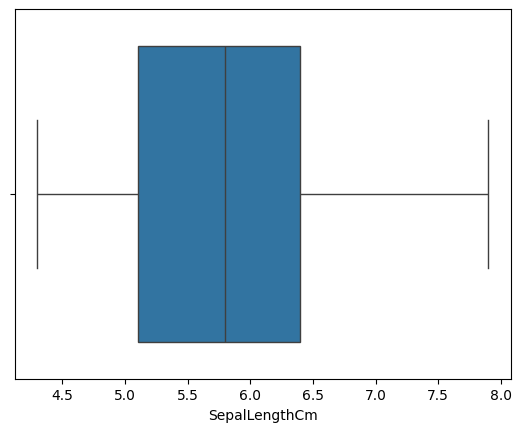

In [102]:
sns.boxplot(data = df, x = df["SepalLengthCm"])

<Axes: xlabel='SepalWidthCm'>

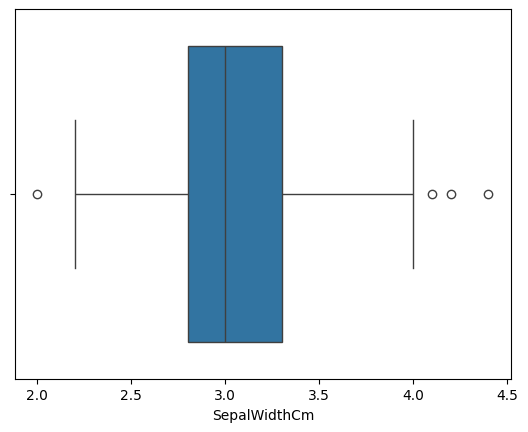

In [103]:
sns.boxplot(data = df, x = df["SepalWidthCm"])